In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #library used to create visualizations
import seaborn as sns
import csv

In [2]:
#read file
filename = 'data/commodity_exports.csv'
exports = pd.read_csv(filename, encoding = "ISO-8859-1")
exports.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,HS,2018,201803,18-Mar,6,1,2,Exports,36,Australia,...,NaN,NaN,NaN,NaN,21000.0,NaN,61918,NaN,NaN,0
1,HS,2018,201809,18-Sep,4,0,2,Exports,203,Czech Rep.,...,NaN,NaN,NaN,NaN,48000.0,NaN,47083,NaN,NaN,0
2,HS,2018,201809,18-Sep,6,1,2,Exports,203,Czech Rep.,...,NaN,NaN,NaN,NaN,277.0,NaN,2541,NaN,NaN,0
3,HS,2018,201809,18-Sep,6,1,2,Exports,203,Czech Rep.,...,NaN,NaN,NaN,NaN,44525.0,NaN,178524,NaN,NaN,0
4,HS,2018,201802,18-Feb,6,1,2,Exports,276,Germany,...,NaN,NaN,NaN,NaN,1279.0,NaN,112085,NaN,NaN,0


In [3]:
#replace elements in commodity column
exports['Commodity'].replace({"Dog or cat food; (not put up for retail sale), used in animal feeding":"AnimalFodder",
                         "Wheat and meslin":"Wheat",
                         "Iron ores and concentrates; including roasted iron pyrites":"IronOre",
                         "Slag, dross; (other than granulated slag), scalings and other waste from the manufacture of iron or steel":"Slag",
                         "Base metals, silver or gold, clad with platinum; not further worked than semi-manufactured":"GoldOre",
                         "Cereal groats and meal; of maize (corn)":"Corn",
                         "Vegetable oils; sunflower seed or safflower oil and their fractions, other than crude, whether or not refined, but not chemically modified":"SunflowerOil",
                         "Vegetable oils; low erucic acid rape or colza oil and its fractions, crude":"RapeseedOil",
                         "Copper ores and concentrates":"Copper",
                         "Coal; anthracite, whether or not pulverised, but not agglomerated":"Coal",
                         "Oils; petroleum oils and oils obtained from bituminous minerals, crude":"CrudePetroleum",
                         "Petroleum gases and other gaseous hydrocarbons; liquefied, natural gas":"RefinedPetroleum",
                         "Iron or steel, pig iron, spiegeleisen; granules thereof":"Steel",
                         "Steel, stainless; cold-drawn or cold-rolled, tubes and pipes of circular cross-section":"RolledSteel",
                         "Cooking appliances and plate warmers; for gas fuel or for both gas and other fuels, of iron or steel":"Gas",
                         "Steel, stainless; table, kitchen and other household articles and parts thereof":"StainlessSteel",
                         "Iron or steel; cast articles, excluding grinding balls and similar articles for mills, other than of non-malleable cast iron":"CastIron",
                         "Nickel; unwrought, not alloyed":"Nickel",
                         "Aluminium; unwrought, alloys":"Aluminium",
                         "Barley":"Barley"
                         },inplace=True)

In [4]:
#clean up dataframe - remove columns with Nan
nan_value = float("NaN")
exports.dropna(how='all',axis=1,inplace=True)
display(exports)

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,Partner Code,Partner,Commodity Code,Commodity,Netweight (kg),Trade Value (US$),Flag
0,HS,2018,201803,18-Mar,6,1,2,Exports,36,Australia,804,Ukraine,230990,AnimalFodder,21000.0,61918,0
1,HS,2018,201809,18-Sep,4,0,2,Exports,203,Czech Rep.,804,Ukraine,1003,Barley,48000.0,47083,0
2,HS,2018,201809,18-Sep,6,1,2,Exports,203,Czech Rep.,804,Ukraine,732393,StainlessSteel,277.0,2541,0
3,HS,2018,201809,18-Sep,6,1,2,Exports,203,Czech Rep.,804,Ukraine,732111,Gas,44525.0,178524,0
4,HS,2018,201802,18-Feb,6,1,2,Exports,276,Germany,804,Ukraine,732599,CastIron,1279.0,112085,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15718,HS,2018,201807,1-Jul,6,1,2,Exports,97,EU,804,Ukraine,720510,Steel,10016.0,13816,0
15719,HS,2018,201806,1-Jun,6,1,2,Exports,112,Belarus,643,Russian Federation,720510,Steel,755000.0,370600,0
15720,HS,2018,201812,1-Dec,6,1,2,Exports,97,EU,643,Russian Federation,720510,Steel,37845.0,96235,0
15721,HS,2018,201803,1-Mar,4,0,2,Exports,440,Lithuania,643,Russian Federation,1001,Wheat,20000.0,7396,0


In [5]:
reduce_ex = exports.drop(['Classification','Period','Trade Flow Code','Is Leaf Code','Flag','Commodity Code','Partner Code','Reporter Code'], axis=1)
reduce_ex


,Year,Period Desc.,Aggregate Level,Trade Flow,Reporter,Partner,Commodity,Netweight (kg),Trade Value (US$)
0,2018,18-Mar,6,Exports,Australia,Ukraine,AnimalFodder,21000.0,61918
1,2018,18-Sep,4,Exports,Czech Rep.,Ukraine,Barley,48000.0,47083
2,2018,18-Sep,6,Exports,Czech Rep.,Ukraine,StainlessSteel,277.0,2541
3,2018,18-Sep,6,Exports,Czech Rep.,Ukraine,Gas,44525.0,178524
4,2018,18-Feb,6,Exports,Germany,Ukraine,CastIron,1279.0,112085
...,...,...,...,...,...,...,...,...,...
15718,2018,1-Jul,6,Exports,EU,Ukraine,Steel,10016.0,13816
15719,2018,1-Jun,6,Exports,Belarus,Russian Federation,Steel,755000.0,370600
15720,2018,1-Dec,6,Exports,EU,Russian Federation,Steel,37845.0,96235
15721,2018,1-Mar,4,Exports,Lithuania,Russian Federation,Wheat,20000.0,7396


C:\Users\dcolu\AppData\Local\Temp\ipykernel_21776\682551070.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = reduce_ex.corr()


<function matplotlib.pyplot.show(close=None, block=None)>

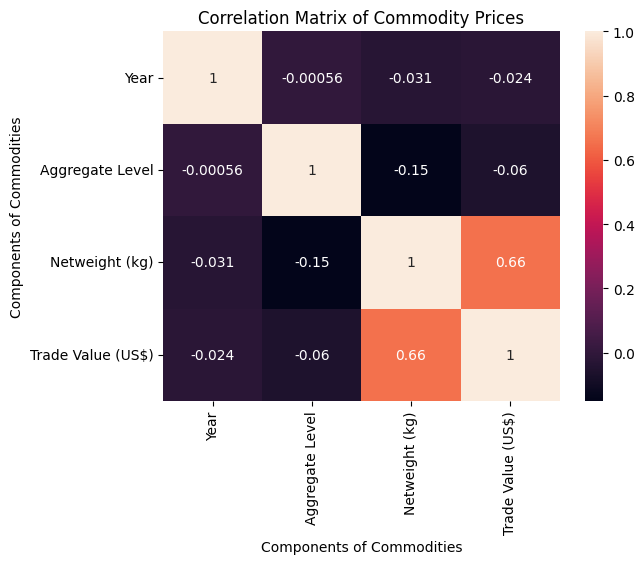

In [6]:
reduce_ex.iloc[:,:8]
correlation_matrix = reduce_ex.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix of Commodity Prices")
plt.xlabel("Components of Commodities")
plt.ylabel("Components of Commodities")
plt.show
 

In [7]:
#sorting the correlation matrix
correlation_mat = reduce_ex.corr()
corr_pairs = correlation_mat.unstack()
print(corr_pairs)

Year               Year                 1.000000
                   Aggregate Level     -0.000565
                   Netweight (kg)      -0.030891
                   Trade Value (US$)   -0.023976
Aggregate Level    Year                -0.000565
                   Aggregate Level      1.000000
                   Netweight (kg)      -0.150208
                   Trade Value (US$)   -0.060137
Netweight (kg)     Year                -0.030891
                   Aggregate Level     -0.150208
                   Netweight (kg)       1.000000
                   Trade Value (US$)    0.656564
Trade Value (US$)  Year                -0.023976
                   Aggregate Level     -0.060137
                   Netweight (kg)       0.656564
                   Trade Value (US$)    1.000000
dtype: float64


C:\Users\dcolu\AppData\Local\Temp\ipykernel_21776\679654450.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_mat = reduce_ex.corr()


In [8]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
print(sorted_pairs)

Aggregate Level    Netweight (kg)      -0.150208
Netweight (kg)     Aggregate Level     -0.150208
Aggregate Level    Trade Value (US$)   -0.060137
Trade Value (US$)  Aggregate Level     -0.060137
Year               Netweight (kg)      -0.030891
Netweight (kg)     Year                -0.030891
Year               Trade Value (US$)   -0.023976
Trade Value (US$)  Year                -0.023976
Year               Aggregate Level     -0.000565
Aggregate Level    Year                -0.000565
Netweight (kg)     Trade Value (US$)    0.656564
Trade Value (US$)  Netweight (kg)       0.656564
Year               Year                 1.000000
Aggregate Level    Aggregate Level      1.000000
Netweight (kg)     Netweight (kg)       1.000000
Trade Value (US$)  Trade Value (US$)    1.000000
dtype: float64


In [9]:
#select negative correlation pairs
negative_pairs = sorted_pairs[sorted_pairs < 0]
print(negative_pairs)

Aggregate Level    Netweight (kg)      -0.150208
Netweight (kg)     Aggregate Level     -0.150208
Aggregate Level    Trade Value (US$)   -0.060137
Trade Value (US$)  Aggregate Level     -0.060137
Year               Netweight (kg)      -0.030891
Netweight (kg)     Year                -0.030891
Year               Trade Value (US$)   -0.023976
Trade Value (US$)  Year                -0.023976
Year               Aggregate Level     -0.000565
Aggregate Level    Year                -0.000565
dtype: float64


In [10]:
#select strong correlation pairs (magnitude greater than 0.5)
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
print(strong_pairs)

Netweight (kg)     Trade Value (US$)    0.656564
Trade Value (US$)  Netweight (kg)       0.656564
Year               Year                 1.000000
Aggregate Level    Aggregate Level      1.000000
Netweight (kg)     Netweight (kg)       1.000000
Trade Value (US$)  Trade Value (US$)    1.000000
dtype: float64


<AxesSubplot: title={'center': 'Types of Partners'}>

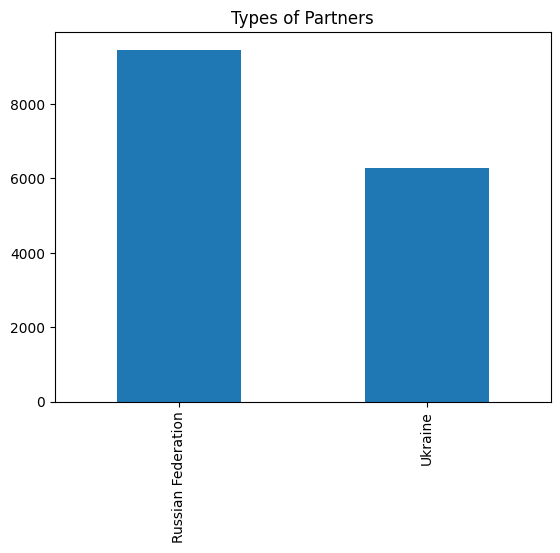

In [11]:
#create bar chart
title=("Types of Partners")
exports.Partner.value_counts().plot(kind='bar',title=title)

<AxesSubplot: title={'center': 'Number of Commodity Occurrences from 2018-2022'}>

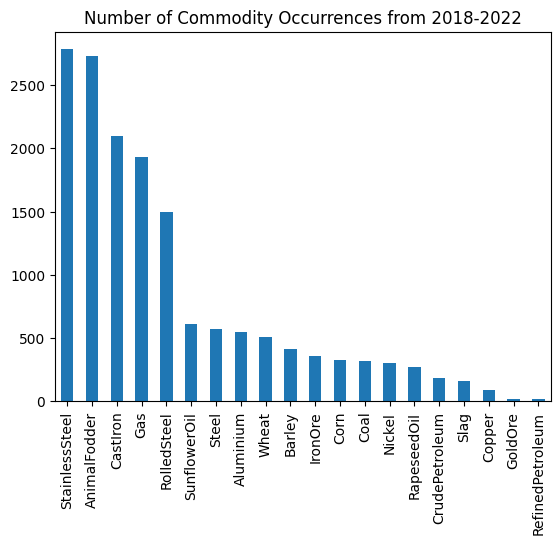

In [12]:
#create bar chart
title=("Number of Commodity Occurrences from 2018-2022")
exports.Commodity.value_counts().plot(kind='bar',title=title)

In [13]:
#groupby Period
gk = exports.groupby('Period')
gk.first()

,Classification,Year,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,Partner Code,Partner,Commodity Code,Commodity,Netweight (kg),Trade Value (US$),Flag
Period,,,,,,,,,,,,,,,,
201801,HS,2018,18-Jan,6,1,2,Exports,703,Slovakia,804,Ukraine,732111,Gas,1483.0,8850,0
201802,HS,2018,18-Feb,6,1,2,Exports,276,Germany,804,Ukraine,732599,CastIron,1279.0,112085,0
201803,HS,2018,18-Mar,6,1,2,Exports,36,Australia,804,Ukraine,230990,AnimalFodder,21000.0,61918,0
201804,HS,2018,18-Apr,6,1,2,Exports,112,Belarus,804,Ukraine,732111,Gas,78885.0,273200,0
201805,HS,2018,18-May,6,1,2,Exports,792,Turkey,804,Ukraine,732599,CastIron,20143.0,38992,0
201806,HS,2018,18-Jun,6,1,2,Exports,792,Turkey,804,Ukraine,760120,Aluminium,24890.0,63855,0
201807,HS,2018,18-Jul,6,1,2,Exports,616,Poland,804,Ukraine,732111,Gas,21216.0,154561,0
201808,HS,2018,18-Aug,4,0,2,Exports,428,Latvia,804,Ukraine,2619,Slag,209200.0,6281,0
201809,HS,2018,18-Sep,4,0,2,Exports,203,Czech Rep.,804,Ukraine,1003,Barley,48000.0,47083,0


In [14]:
#groupby Year
gk = exports.groupby('Year')
gk.first()

,Classification,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,Partner Code,Partner,Commodity Code,Commodity,Netweight (kg),Trade Value (US$),Flag
Year,,,,,,,,,,,,,,,,
2018,HS,201803,18-Mar,6,1,2,Exports,36,Australia,804,Ukraine,230990,AnimalFodder,21000.0,61918,0
2019,HS,201902,19-Feb,6,1,2,Exports,705,Slovenia,804,Ukraine,732393,StainlessSteel,2.0,64,0
2020,HS,202012,20-Dec,6,1,2,Exports,792,Turkey,804,Ukraine,732111,Gas,94154.0,394989,0
2021,HS,202108,21-Aug,6,1,2,Exports,643,Russian Federation,804,Ukraine,760120,Aluminium,6575.0,19902,0
2022,HS,202205,22-May,6,1,2,Exports,440,Lithuania,804,Ukraine,732393,StainlessSteel,2.0,10,0


In [15]:
corr_year = gk
corr_year.corr('pearson')

C:\Users\dcolu\AppData\Local\Temp\ipykernel_21776\2566628372.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  corr_year.corr('pearson')


Period  Aggregate Level  Is Leaf Code  \
Year                                                              
2018 Period             1.000000        -0.005766     -0.005766   
     Aggregate Level   -0.005766         1.000000      1.000000   
     Is Leaf Code      -0.005766         1.000000      1.000000   
     Trade Flow Code         NaN              NaN           NaN   
     Reporter Code      0.014674         0.067420      0.067420   
     Partner Code       0.025905        -0.023534     -0.023534   
     Commodity Code    -0.012584         0.564420      0.564420   
     Netweight (kg)     0.000514        -0.183166     -0.183166   
     Trade Value (US$)  0.005935        -0.091197     -0.091197   
     Flag                    NaN              NaN           NaN   
2019 Period             1.000000         0.017407      0.017407   
     Aggregate Level    0.017407         1.000000      1.000000   
     Is Leaf Code       0.017407         1.000000      1.000000   
     Trade Flow Code         NaN              NaN           NaN   
     Reporter Code      0.005079         0.059286      0.059286   
     Partner Code      -0.001173        -0.028793     -0.028793   
     Commodity Code     0.015568         0.579373      0.579373   
     Netweight (kg)    -0.007521        -0.223674     -0.223674   
     Trade Value (US$) -0.005618        -0.136672     -0.136672   
     Flag                    NaN              NaN           NaN   
2020 Period             1.000000        -0.012008     -0.012008   
     Aggregate Level   -0.012008         1.000000      1.000000   
     Is Leaf Code      -0.012008         1.000000      1.000000   
     Trade Flow Code         NaN              NaN           NaN   
     Reporter Code     -0.017871         0.086292      0.086292   
     Partner Code       0.007960        -0.054633     -0.054633   
     Commodity Code    -0.017539         0.577647      0.577647   
     Netweight (kg)    -0.017475        -0.101801     -0.101801   
     Trade Value (US$) -0.003470        -0.000910     -0.000910   
     Flag                    NaN              NaN           NaN   
2021 Period             1.000000         0.010151      0.010151   
     Aggregate Level    0.010151         1.000000      1.000000   
     Is Leaf Code       0.010151         1.000000      1.000000   
     Trade Flow Code         NaN              NaN           NaN   
     Reporter Code      0.010369         0.080336      0.080336   
     Partner Code       0.008906        -0.085800     -0.085800   
     Commodity Code     0.009021         0.596647      0.596647   
     Netweight (kg)     0.004482        -0.058836     -0.058836   
     Trade Value (US$)  0.016041        -0.005956     -0.005956   
     Flag                    NaN              NaN           NaN   
2022 Period             1.000000         0.037800      0.037800   
     Aggregate Level    0.037800         1.000000      1.000000   
     Is Leaf Code       0.037800         1.000000      1.000000   
     Trade Flow Code         NaN              NaN           NaN   
     Reporter Code      0.004090         0.076071      0.076071   
     Partner Code       0.071840         0.009595      0.009595   
     Commodity Code    -0.004670         0.535937      0.535937   
     Netweight (kg)    -0.051561         0.014703      0.014703   
     Trade Value (US$) -0.047432         0.035797      0.035797   
     Flag                    NaN              NaN           NaN   

                        Trade Flow Code  Reporter Code  Partner Code  \
Year                                                                   
2018 Period                         NaN       0.014674      0.025905   
     Aggregate Level                NaN       0.067420     -0.023534   
     Is Leaf Code                   NaN       0.067420     -0.023534   
     Trade Flow Code                NaN            NaN           NaN   
     Reporter Code                  NaN       1.000000      0.005512   
     Partner Code                   N

In [16]:
#groupby year 2018
year18 = gk.get_group(2018)
year18.rename(columns={"Commodity":"Commodity_18"}, inplace=True)
#gk.get_group(2018)

C:\Users\dcolu\AppData\Local\Temp\ipykernel_21776\3723426637.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year18.rename(columns={"Commodity":"Commodity_18"}, inplace=True)


In [17]:
#groupby year 2019
year19 = gk.get_group(2019)
year19.rename(columns={"Commodity":"Commodity_19"},inplace=True)

#gk.get_group(2019)

C:\Users\dcolu\AppData\Local\Temp\ipykernel_21776\1166493936.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year19.rename(columns={"Commodity":"Commodity_19"},inplace=True)


In [18]:
#groupby year 2020
year20 = gk.get_group(2020)
year20.rename(columns={"Commodity":"Commodity_20"},inplace=True)

#gk.get_group(2020)

C:\Users\dcolu\AppData\Local\Temp\ipykernel_21776\3450363874.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year20.rename(columns={"Commodity":"Commodity_20"},inplace=True)


In [19]:
#groupby year 2021
year21 = gk.get_group(2021)
year21.rename(columns={"Commodity":"Commodity_21"},inplace=True)

#gk.get_group(2021)

C:\Users\dcolu\AppData\Local\Temp\ipykernel_21776\1577810218.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year21.rename(columns={"Commodity":"Commodity_21"},inplace=True)


In [20]:
#groupby year 2022
year22 = gk.get_group(2022)
year22.rename(columns={"Commodity":"Commodity_22"}, inplace=True)

#gk.get_group(2022)

C:\Users\dcolu\AppData\Local\Temp\ipykernel_21776\3008167653.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year22.rename(columns={"Commodity":"Commodity_22"}, inplace=True)


**How did the Trade Value prices of each commodity vary from 2018 - 22?**

C:\Users\dcolu\AppData\Local\Temp\ipykernel_21776\1649572423.py:22: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


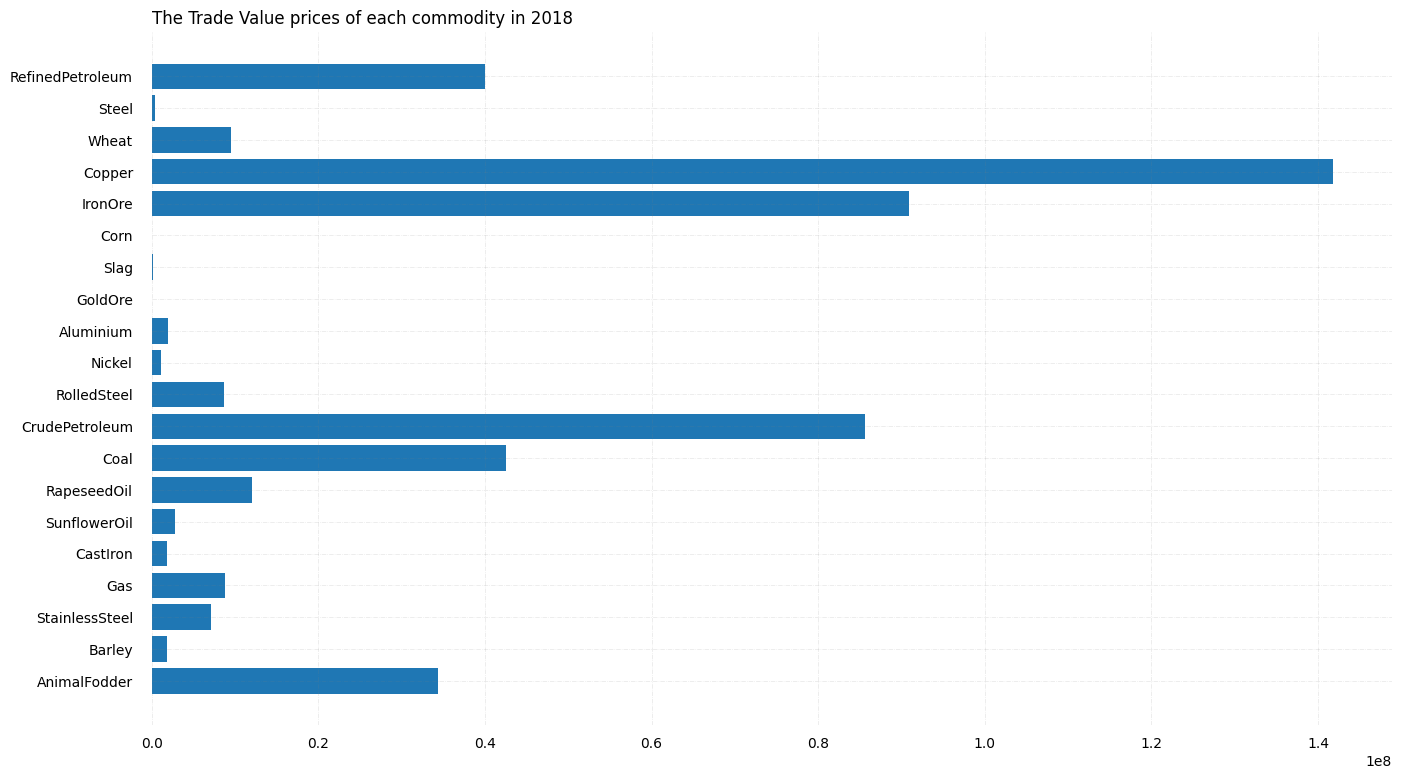

In [21]:
from matplotlib import pyplot as plt
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
comm = year18['Commodity_18']
price = year18['Trade Value (US$)']

# Horizontal Bar Plot
ax.barh(comm,price)
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Add Plot Title
ax.set_title('The Trade Value prices of each commodity in 2018',
             loc ='left', )
 
 
# Show Plot
plt.show()

C:\Users\dcolu\AppData\Local\Temp\ipykernel_21776\938313880.py:22: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


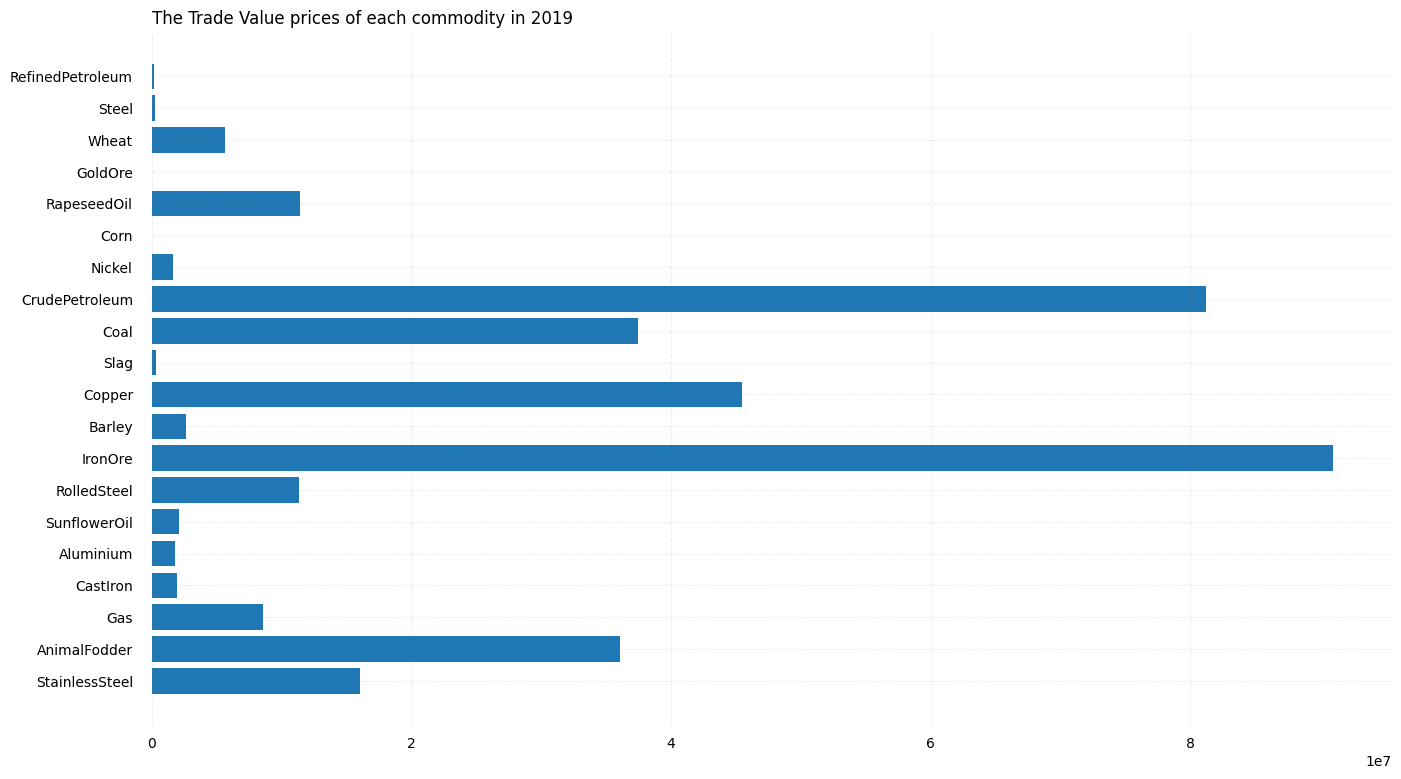

In [22]:
from matplotlib import pyplot as plt
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
comm = year19['Commodity_19']
price = year19['Trade Value (US$)']

# Horizontal Bar Plot
ax.barh(comm,price)
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Add Plot Title
ax.set_title('The Trade Value prices of each commodity in 2019',
             loc ='left', )
 
 
# Show Plot
plt.show()

C:\Users\dcolu\AppData\Local\Temp\ipykernel_21776\2056472961.py:22: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


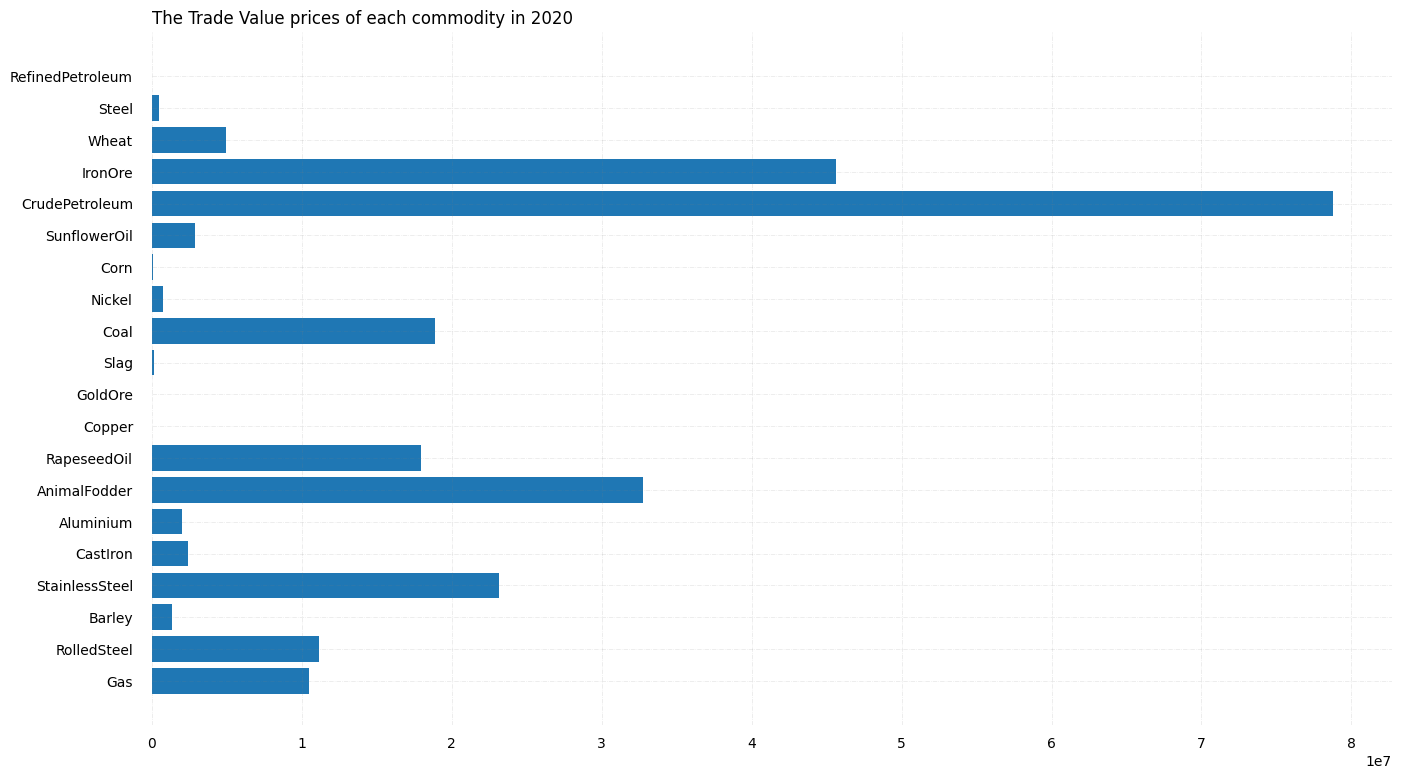

In [23]:
from matplotlib import pyplot as plt
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
comm = year20['Commodity_20']
price = year20['Trade Value (US$)']

# Horizontal Bar Plot
ax.barh(comm,price)
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Add Plot Title
ax.set_title('The Trade Value prices of each commodity in 2020',
             loc ='left', )
 
 
# Show Plot
plt.show()

C:\Users\dcolu\AppData\Local\Temp\ipykernel_21776\1153141545.py:22: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


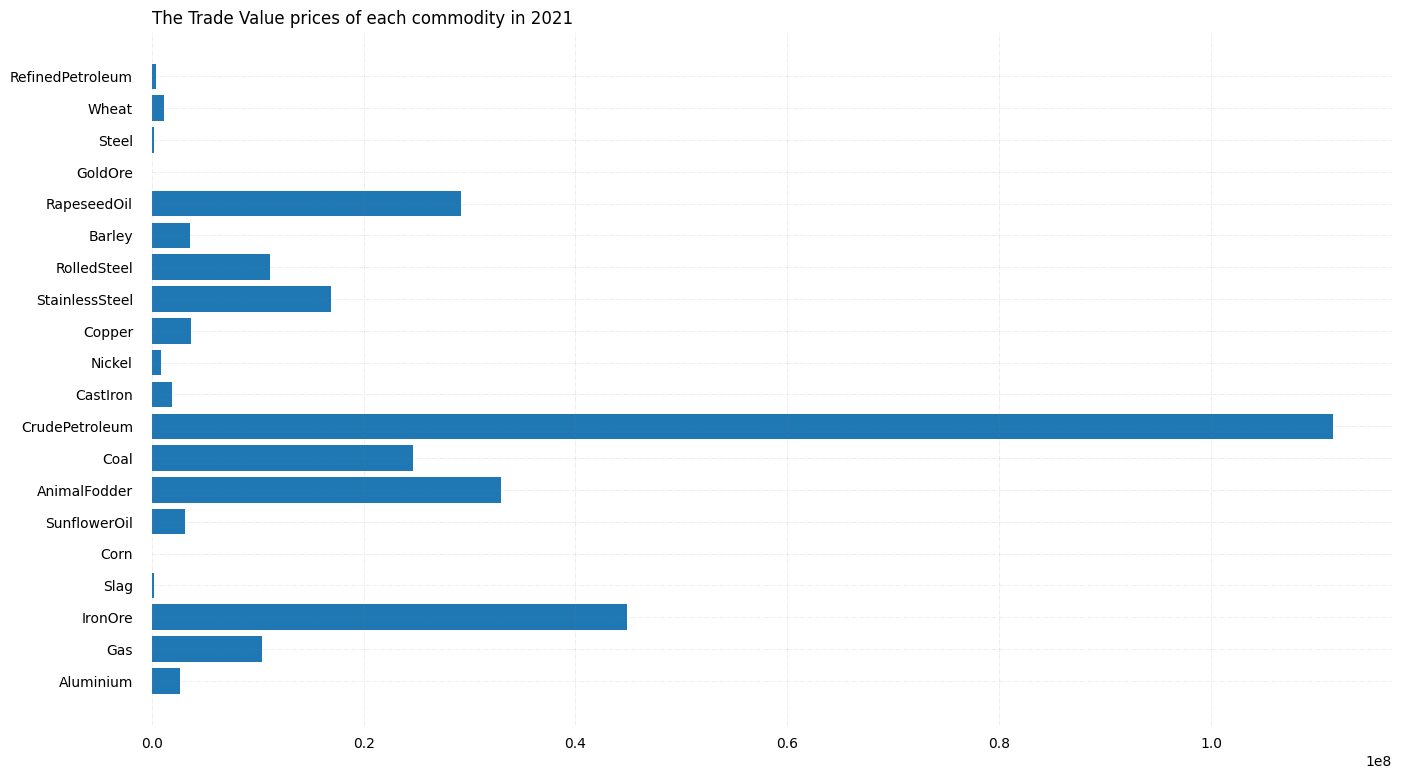

In [24]:
from matplotlib import pyplot as plt
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
comm = year21['Commodity_21']
price = year21['Trade Value (US$)']

# Horizontal Bar Plot
ax.barh(comm,price)
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Add Plot Title
ax.set_title('The Trade Value prices of each commodity in 2021',
             loc ='left', )
 
 
# Show Plot
plt.show()

C:\Users\dcolu\AppData\Local\Temp\ipykernel_21776\1164777749.py:22: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


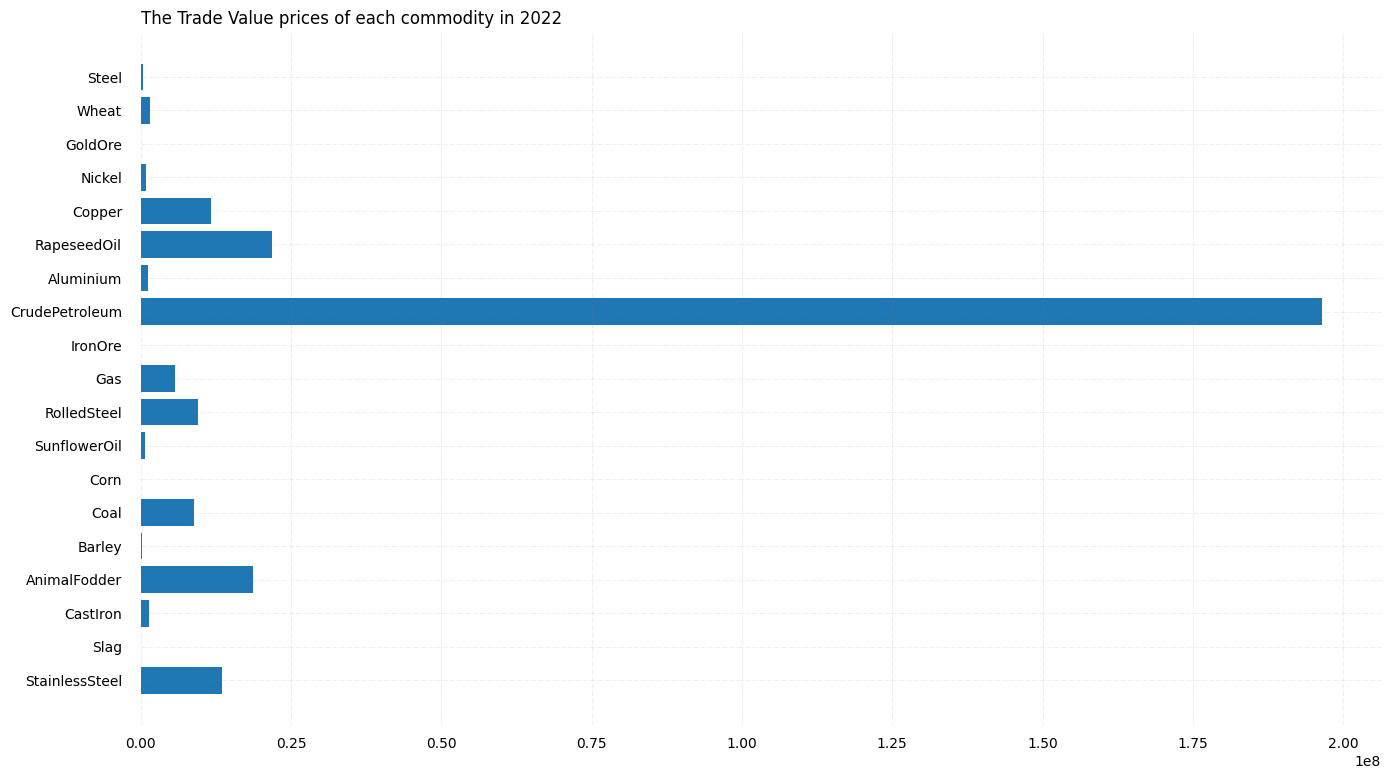

In [25]:
from matplotlib import pyplot as plt
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
comm = year22['Commodity_22']
price = year22['Trade Value (US$)']

# Horizontal Bar Plot
ax.barh(comm,price)
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Add Plot Title
ax.set_title('The Trade Value prices of each commodity in 2022',
             loc ='left', )
 
 
# Show Plot
plt.show()

**Number of Commodities Per Year**

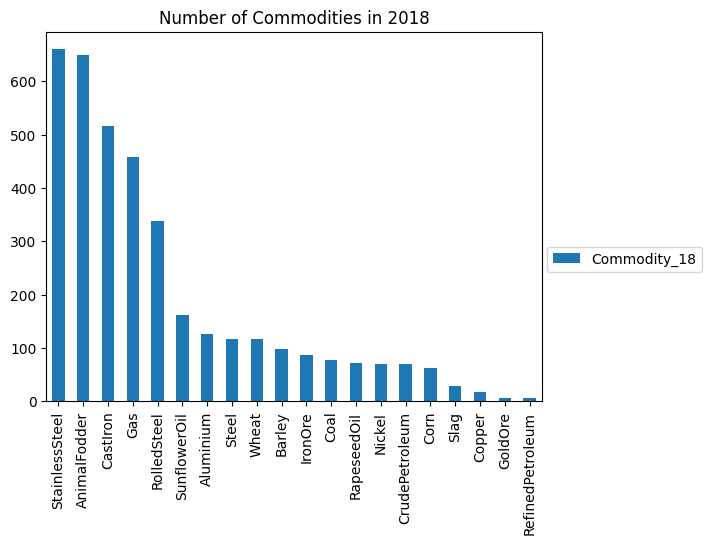

In [26]:
title=("Number of Commodities in 2018")
year18.Commodity_18.value_counts().plot(kind='bar',title=title)
plt.legend(loc=(1.01, 0.35))

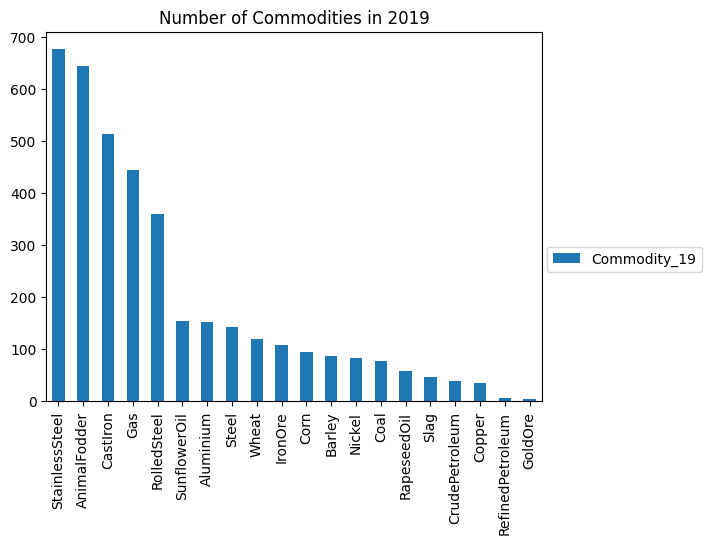

In [27]:
title=("Number of Commodities in 2019")
year19.Commodity_19.value_counts().plot(kind='bar',title=title)
plt.legend(loc=(1.01, 0.35))


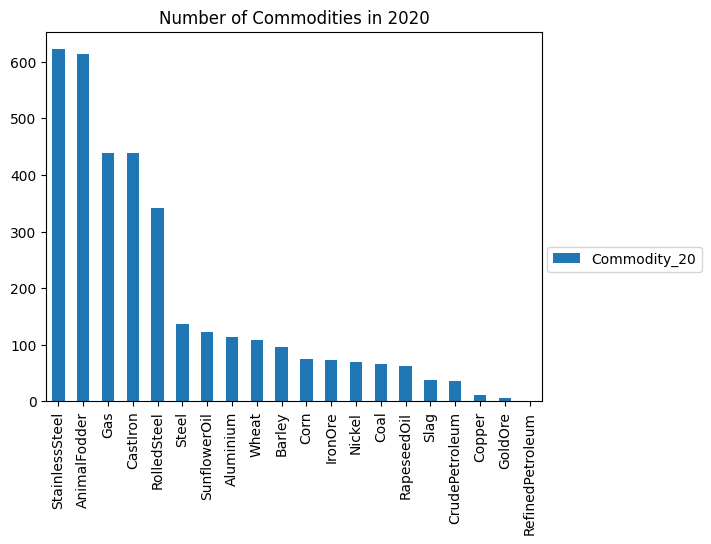

In [28]:
title=("Number of Commodities in 2020")
year20.Commodity_20.value_counts().plot(kind='bar',title=title)
plt.legend(loc=(1.01, 0.35))


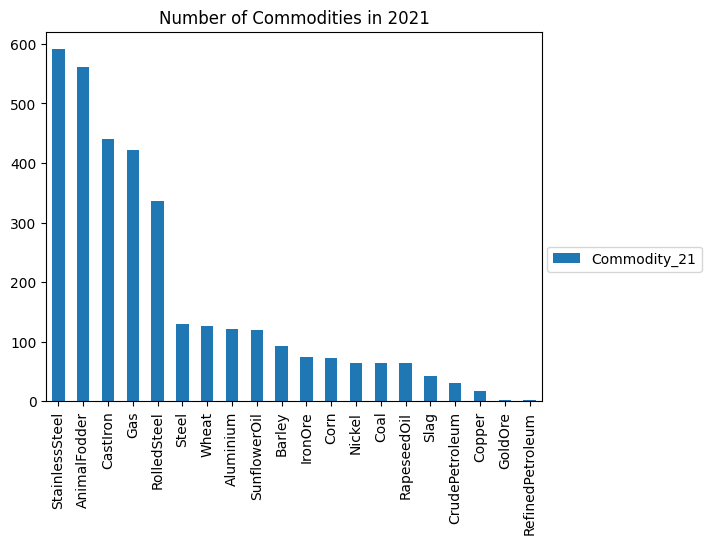

In [29]:
title=("Number of Commodities in 2021")
year21.Commodity_21.value_counts().plot(kind='bar',title=title)
plt.legend(loc=(1.01, 0.35))


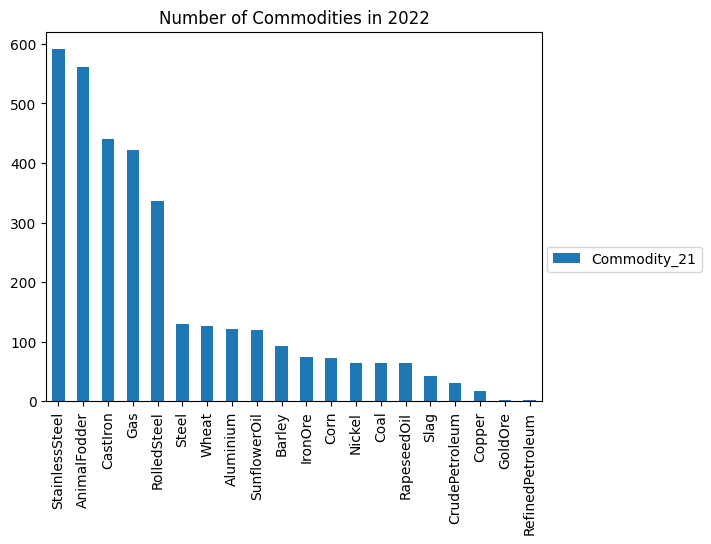

In [30]:
title=("Number of Commodities in 2022")
year21.Commodity_21.value_counts().plot(kind='bar',title=title)
plt.legend(loc=(1.01, 0.35))

**Minimum and maximum of exports ranging from 2018-2022**

In [31]:
# The minimum and maximum values of dataframe
year18.agg(['min','max'])

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,Partner Code,Partner,Commodity Code,Commodity_18,Netweight (kg),Trade Value (US$),Flag
min,HS,2018,201801,1-Apr,4,0,2,Exports,31,ASEAN,643,Russian Federation,1001,Aluminium,0.000000e+00,1,0
max,HS,2018,201812,18-Sep,6,1,2,Exports,975,Vietnam,804,Ukraine,760120,Wheat,1.080383e+09,141755151,0


In [32]:
# The minimum and maximum values of dataframe
year19.agg(['min','max'])

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,Partner Code,Partner,Commodity Code,Commodity_19,Netweight (kg),Trade Value (US$),Flag
min,HS,2019,201901,1-Apr,4,0,2,Exports,31,ASEAN,643,Russian Federation,1001,Aluminium,0.0,0,0
max,HS,2019,201912,19-Sep,6,1,2,Exports,975,Vietnam,804,Ukraine,760120,Wheat,922754000.0,90958853,0


In [33]:
# The minimum and maximum values of dataframe
year20.agg(['min','max'])

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,Partner Code,Partner,Commodity Code,Commodity_20,Netweight (kg),Trade Value (US$),Flag
min,HS,2020,202001,1-Apr,4,0,2,Exports,31,ASEAN,643,Russian Federation,1001,Aluminium,0.0,0,0
max,HS,2020,202012,20-Sep,6,1,2,Exports,975,Vietnam,804,Ukraine,760120,Wheat,528663450.0,78751428,0


In [34]:
# The minimum and maximum values of dataframe
year21.agg(['min','max'])

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,Partner Code,Partner,Commodity Code,Commodity_21,Netweight (kg),Trade Value (US$),Flag
min,HS,2021,202101,1-Apr,4,0,2,Exports,31,Armenia,643,Russian Federation,1001,Aluminium,0.0,0,0
max,HS,2021,202112,21-Sep,6,1,2,Exports,860,Uzbekistan,804,Ukraine,760120,Wheat,426716350.0,111480592,0


In [35]:
# The minimum and maximum values of dataframe
year22.agg(['min','max'])

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,Partner Code,Partner,Commodity Code,Commodity_22,Netweight (kg),Trade Value (US$),Flag
min,HS,2022,202201,1-Apr,4,0,2,Exports,31,Armenia,643,Russian Federation,1001,Aluminium,0.0,1,0
max,HS,2022,202209,22-Sep,6,1,2,Exports,860,Uzbekistan,804,Ukraine,760120,Wheat,336716000.0,196450925,0
